In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [127]:
!pip install sklearn

  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\Aatif Khan Pathan\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [240]:
from sklearn.preprocessing import MinMaxScaler 

In [241]:
# reading dataset

df = pd.read_csv("adult.csv", na_values = '?')

In [242]:
print(df.shape)

print(df.columns)

df.describe(include = 'all')

(48842, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# <b>Objective</b>
To perform <b>Exploratory Data Analysis</b> on given dataset.

In [243]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [244]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [245]:
# missing values in the dataframe

df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [246]:
# removing all missing values and fnlwgt column from the dataset.

df.drop('fnlwgt', axis = 1, inplace = True)
new_df = df.dropna(how = 'any', axis = 0)

# rows removed
row_per = (1- len(new_df.index)/len(df.index))*100
print(f"Rows remove : {round(row_per)}%")

new_df

Rows remove : 7%


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [247]:
new_df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


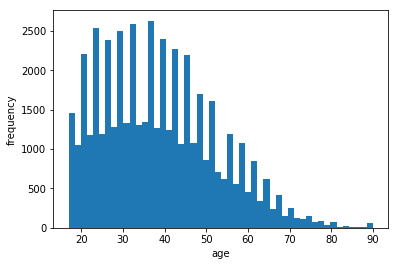

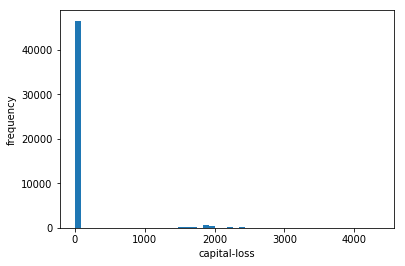

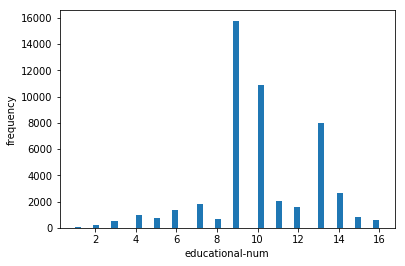

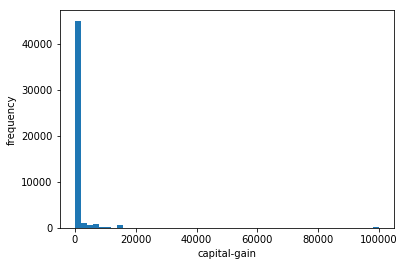

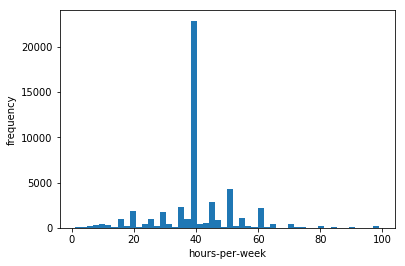

In [248]:


plt.hist(df['age'], bins = 50)
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()


plt.hist(df['capital-loss'], bins = 50)
plt.xlabel('capital-loss')
plt.ylabel('frequency')
plt.show()


plt.hist(df['educational-num'], bins = 50)
plt.xlabel('educational-num')
plt.ylabel('frequency')
plt.show()


plt.hist(df['capital-gain'], bins = 50)
plt.xlabel('capital-gain')
plt.ylabel('frequency')
plt.show()


plt.hist(df['hours-per-week'], bins = 50)
plt.xlabel('hours-per-week')
plt.ylabel('frequency')
plt.show()



# Observation
* <b>Age</b> of max. people lie between <b>30 - 40 yrs</b>.
* <b>Capital-loss</b> and <b>capital-gain</b> is ,<b>zero</b> for most of the people.
* Most of the people are <b>HS-graduate</b>, <b>college passed,</b> or ,<b>bachelors</b>.
* Maximum people works <b> 40 hours</b> per week.


C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



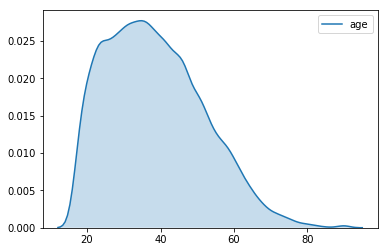

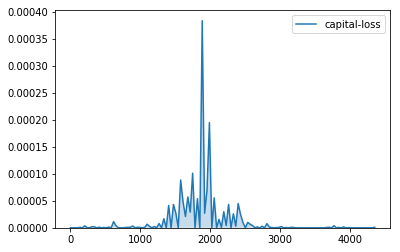

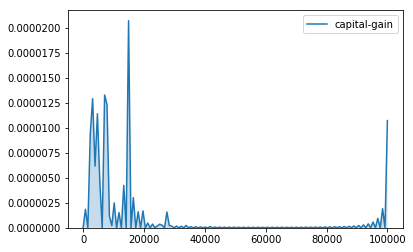

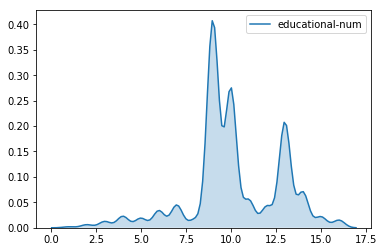

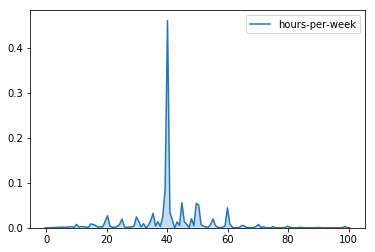

In [249]:

sns.kdeplot(new_df['age'], shade = True)
plt.show()


sns.kdeplot(new_df['capital-loss'], shade = True )
plt.show()

sns.kdeplot(new_df['capital-gain'], shade = True)
plt.show()

sns.kdeplot(new_df['educational-num'], shade = True)
plt.show()

sns.kdeplot(new_df['hours-per-week'], shade = True)
plt.show()

# <b> Observation : </b>

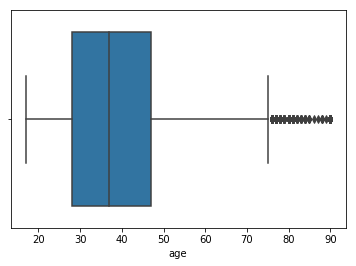

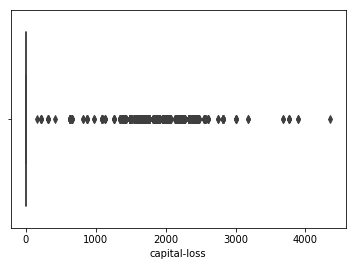

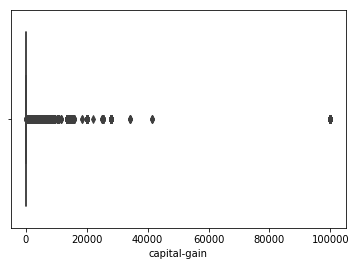

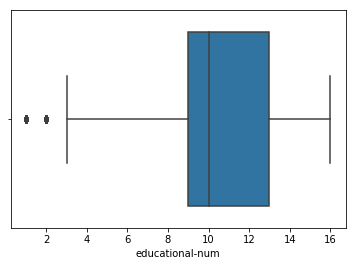

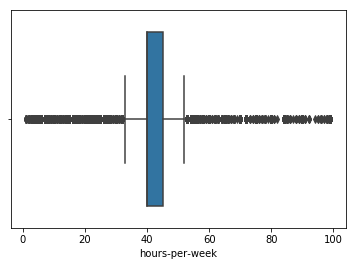

In [250]:
sns.boxplot( new_df['age'])
plt.show()

sns.boxplot(new_df['capital-loss'])
plt.show()

sns.boxplot( new_df['capital-gain'])
plt.show()

sns.boxplot( new_df['educational-num'])
plt.show()

sns.boxplot(new_df['hours-per-week'])
plt.show()

# Observation
* Outliers and mean  can be observed  in esach dataset.

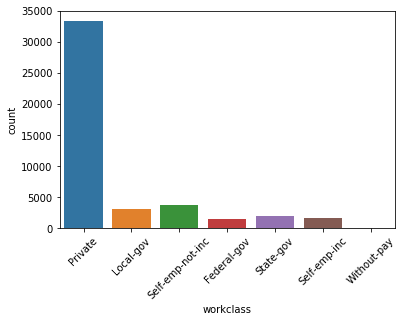

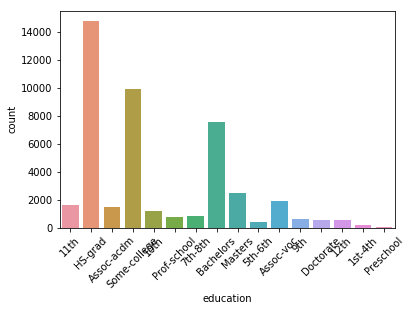

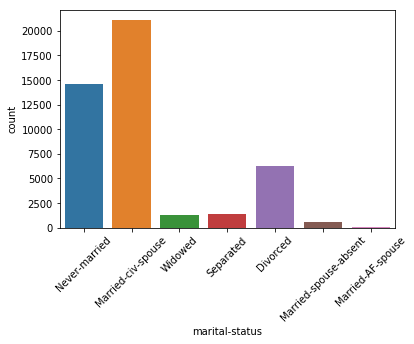

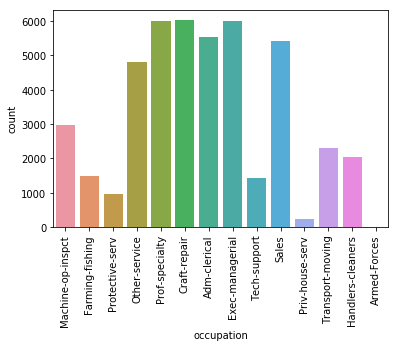

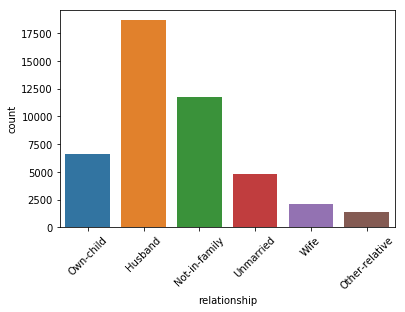

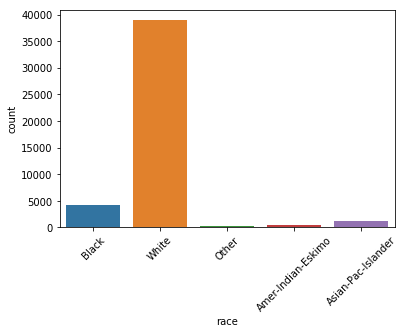

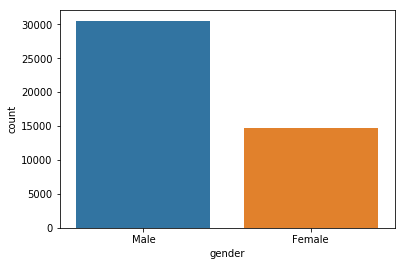

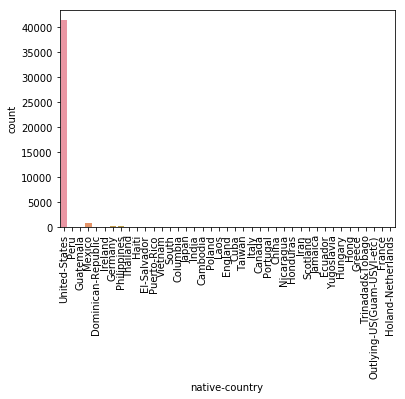

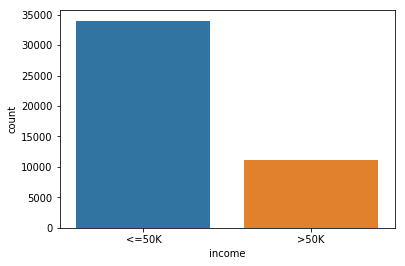

In [251]:
sns.countplot(new_df['workclass'])
plt.xticks(rotation = 45)
plt.show()

sns.countplot(new_df['education'])
plt.xticks(rotation = 45)
plt.show()

sns.countplot(new_df['marital-status'])
plt.xticks(rotation = 45)
plt.show()

sns.countplot( new_df['occupation'])
plt.xticks(rotation = 90)
plt.show()

sns.countplot(new_df['relationship'])
plt.xticks(rotation= 45)
plt.show()

sns.countplot(new_df['race'])
plt.xticks(rotation= 45)
plt.show()

sns.countplot(new_df['gender'])
plt.xticks(rotation= 0)
plt.show()

sns.countplot( new_df['native-country'])
plt.xticks(rotation= 90)
plt.show()

sns.countplot(new_df['income'])
plt.xticks(rotation= 0)
plt.show()

# Observation (max. count)
* Workclass : Private
* Education : High School Graduate
* Marital Status : Married civ Spouse
* Occupation : Craft Repair
* Relationship : Husband
* Race : White
* Gender : Male
* Native Country : United States
* Income : <=50K

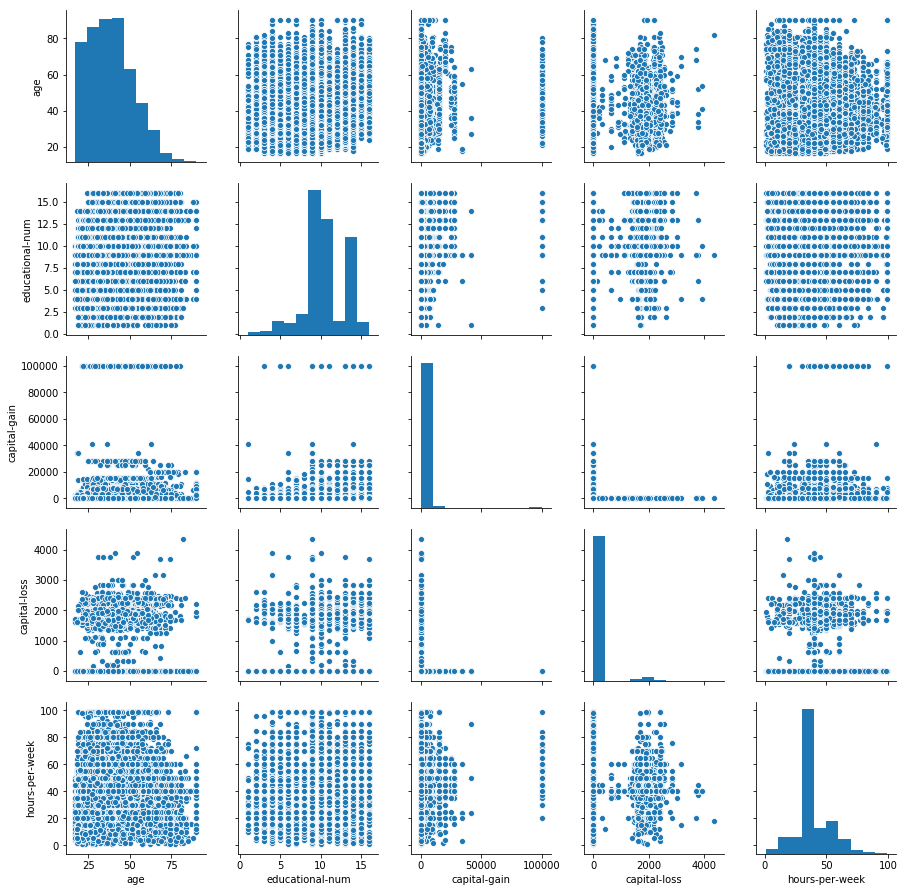

In [252]:
sns.pairplot(new_df)
plt.show()

# Observation :
  No relation is obtained from above observation.

Male      30527
Female    14695
Name: gender, dtype: int64


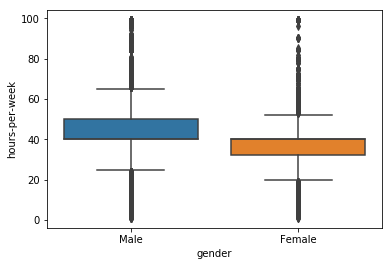

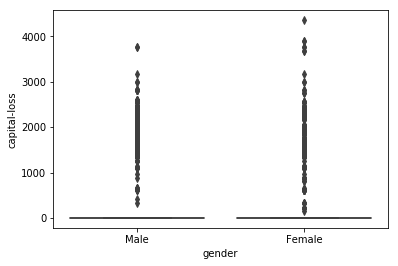

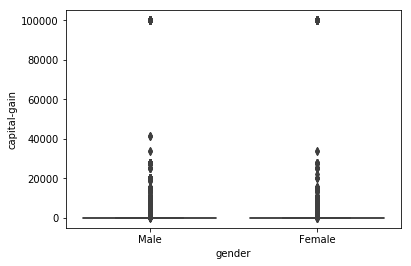

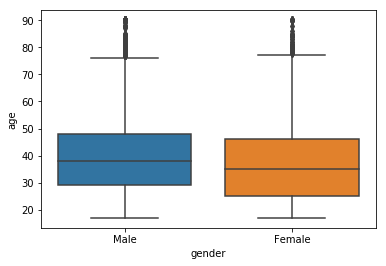

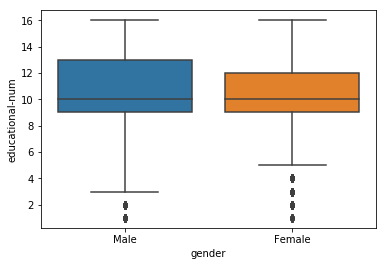

In [253]:
print(new_df['gender'].value_counts())

sns.boxplot(x = 'gender', y = 'hours-per-week', data = new_df)
plt.show()

sns.boxplot(x = 'gender', y = 'capital-loss', data = new_df)
plt.show()

sns.boxplot(x = 'gender', y = 'capital-gain', data = new_df)
plt.show()

sns.boxplot(x = 'gender', y = 'age', data = new_df)
plt.show()

sns.boxplot(x = 'gender', y = 'educational-num', data = new_df)
plt.show()

# Observation 
* On Avg. female are working less hours then male.
* Females have more capital-loss than males.
* Females are little younger than males.

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64


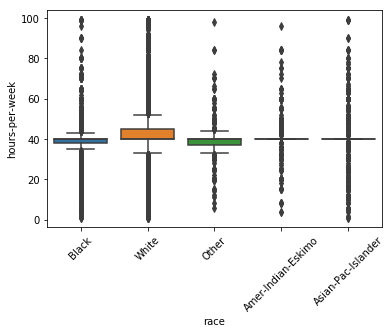

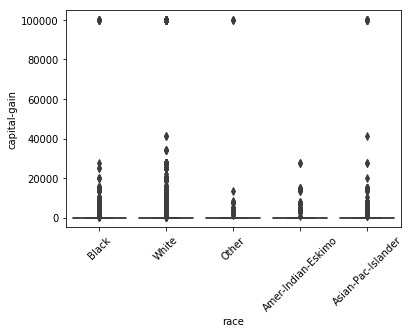

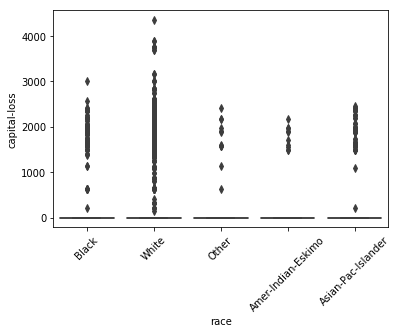

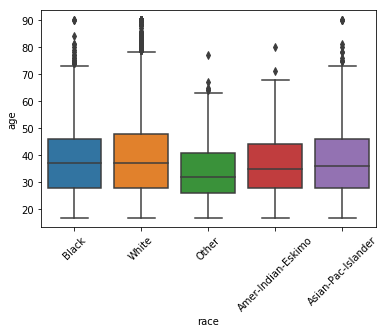

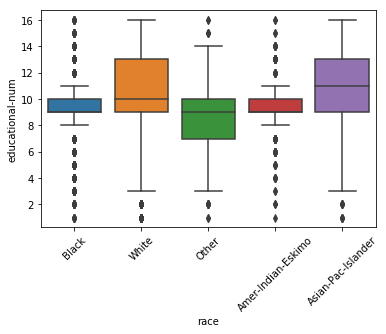

In [254]:
print(new_df['race'].value_counts())

sns.boxplot(x = 'race', y = 'hours-per-week', data = new_df)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x = 'race', y = 'capital-gain', data = new_df)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x = 'race', y = 'capital-loss', data = new_df)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x = 'race', y = 'age', data = new_df)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x = 'race', y = 'educational-num', data = new_df)
plt.xticks(rotation = 45)
plt.show()

# Observation 
* On Avg. <b>white</b> are working <b>more hours</b> and having <b>more capital-loss</b>.

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: occupation, dtype: int64


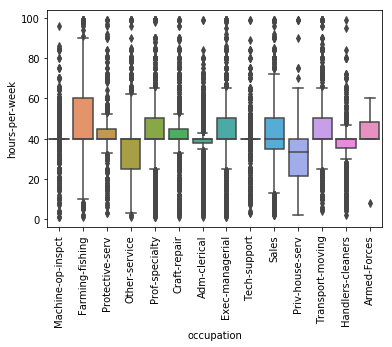

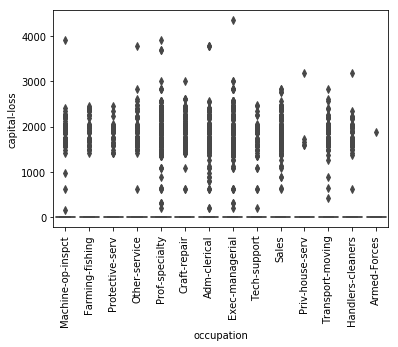

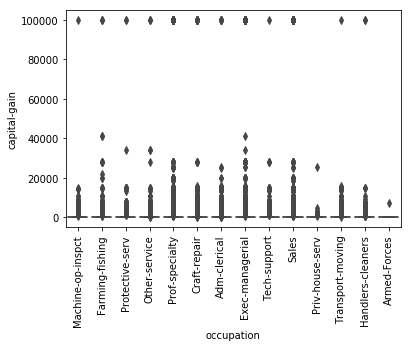

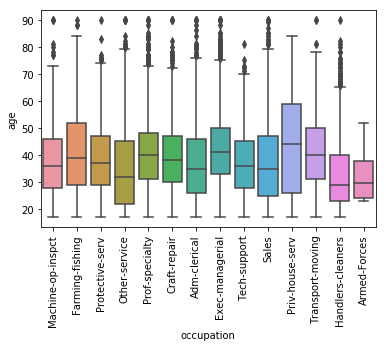

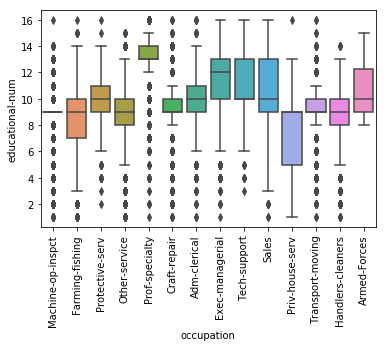

In [255]:
print(new_df['occupation'].value_counts())

sns.boxplot(x = 'occupation', y = 'hours-per-week', data = new_df)
plt.xticks(rotation = 90)
plt.show()

sns.boxplot(x = 'occupation', y = 'capital-loss', data = new_df)
plt.xticks(rotation = 90)
plt.show()

sns.boxplot(x = 'occupation', y = 'capital-gain', data = new_df)
plt.xticks(rotation = 90)
plt.show()

sns.boxplot(x = 'occupation', y = 'age', data = new_df)
plt.xticks(rotation = 90)
plt.show()

sns.boxplot(x = 'occupation', y = 'educational-num', data = new_df)
plt.xticks(rotation = 90)
plt.show()

# Obseravation
* <b>Private-house-serv</b> have <b>less work hours</b>.
* <b>Armed-Forces</b> have almost <b>zero capital-gain</b> and <b>capital-loss</b>.
* <b>Armed-Foreces</b> have <b>least maximum age</b> than other services.


Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64


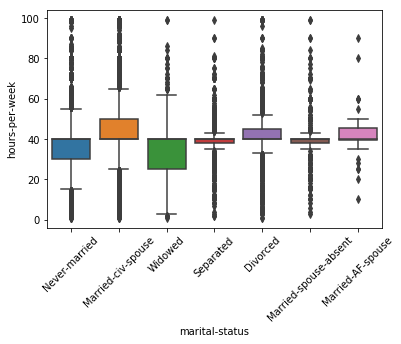

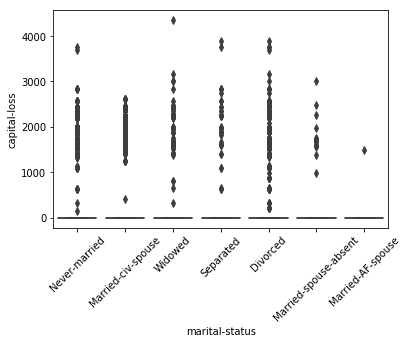

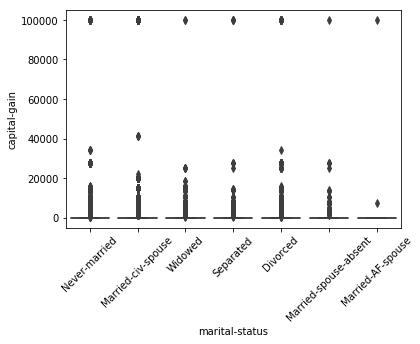

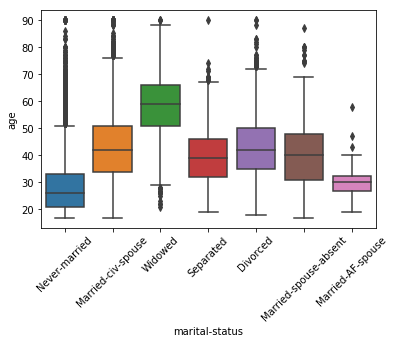

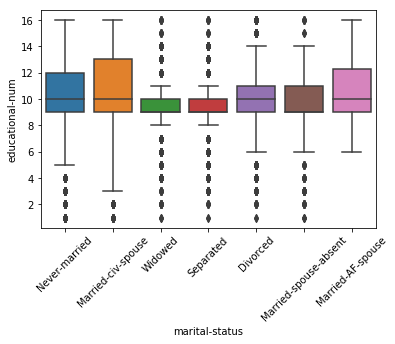

In [256]:
print(new_df['marital-status'].value_counts())

sns.boxplot(x='marital-status', y='hours-per-week', data=new_df)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x='marital-status', y='capital-loss', data=new_df)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x='marital-status', y='capital-gain', data=new_df)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x='marital-status', y='age', data=new_df)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x='marital-status', y='educational-num', data=new_df)
plt.xticks(rotation = 45)
plt.show()

# Obsertvation 
* <b>Widowed</b> and <b>Separated</b> people have <b>same education</b> level.
* <b>Married-spouse</b> work <b>more hours</b> than other.
* <b>Divorced</b> people have <b>more capital-loss</b>.

Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried          4788
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64


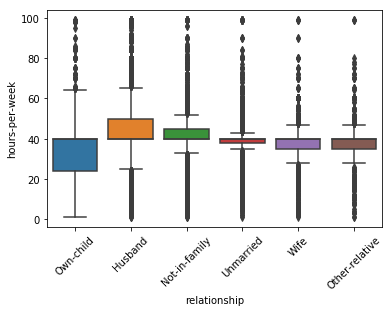

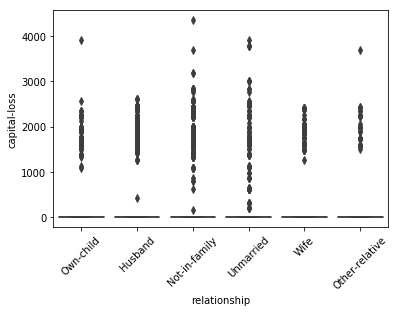

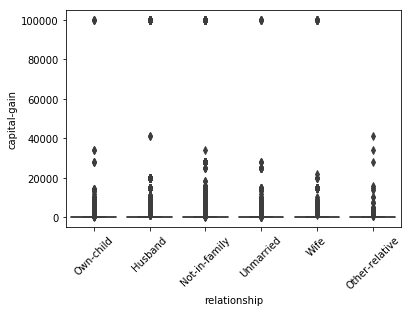

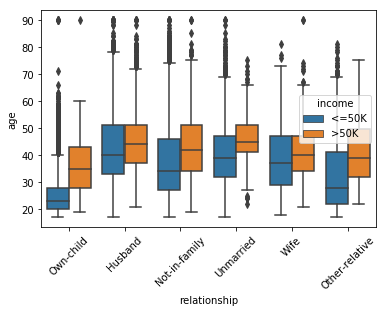

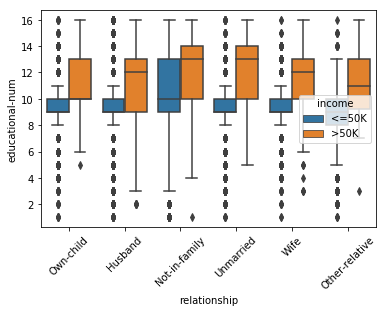

In [257]:
print(new_df['relationship'].value_counts())

sns.boxplot(x='relationship', y='hours-per-week', data=new_df)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x='relationship', y='capital-loss', data=new_df)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x='relationship', y='capital-gain', data=new_df)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x='relationship', y='age', data=new_df, hue = 'income')
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x='relationship', y='educational-num', data=new_df, hue = 'income')
plt.xticks(rotation = 45)
plt.show()

# Observation 
* Husband work more hours.
* Not-in-family and Unmaried have most capital-loss.
* <b>More outliers</b> are present for <b>income <=50k.</b>

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64


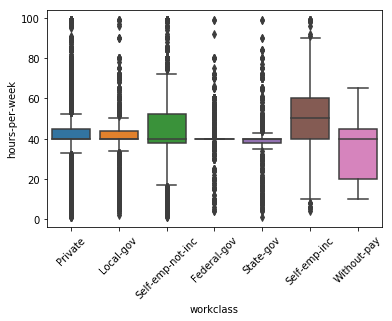

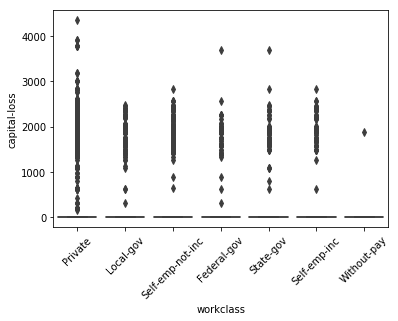

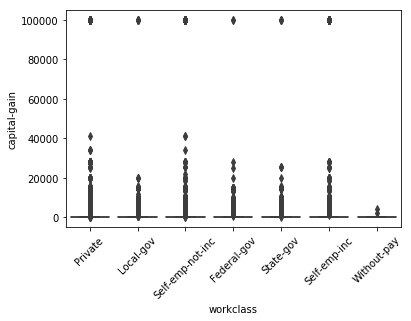

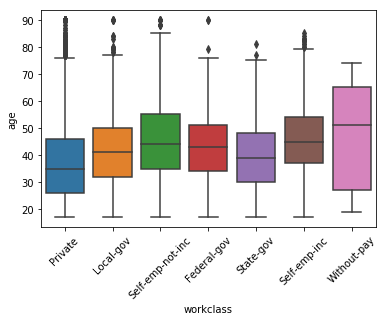

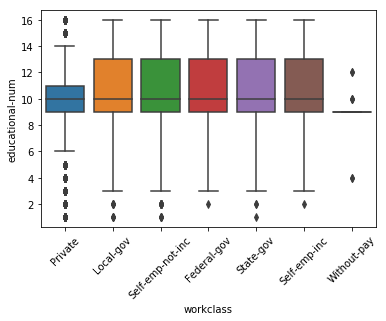

In [258]:
print(new_df['workclass'].value_counts())

sns.boxplot(x='workclass', y='hours-per-week', data=new_df)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x='workclass', y='capital-loss', data=new_df)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x='workclass', y='capital-gain', data=new_df)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x='workclass', y='age', data=new_df)
plt.xticks(rotation = 45)
plt.show()

sns.boxplot(x='workclass', y='educational-num', data=new_df)
plt.xticks(rotation = 45)
plt.show()

# Observation 
* Most of the workers are college graduate.
* Private sactor have most capital-loss.
* Self employed people have to work more.

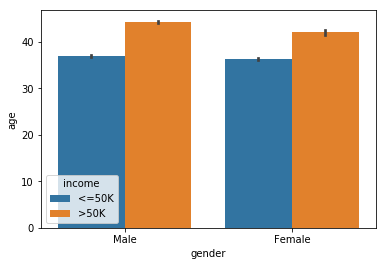

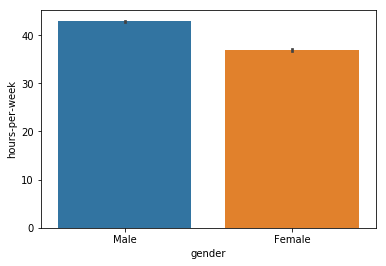

In [259]:
sns.barplot(x = 'gender', y= 'age' , data = new_df, hue = 'income')
plt.show()

sns.barplot(x = 'gender', y= 'hours-per-week' , data = new_df)
plt.show()



# Observation
* Male works more hours than female.
* Male having more income than female.

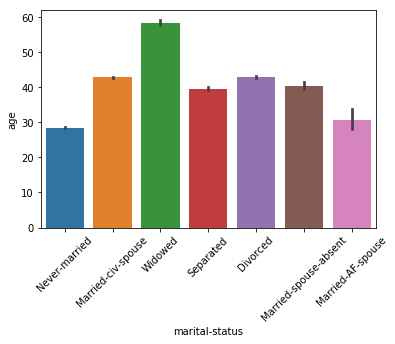

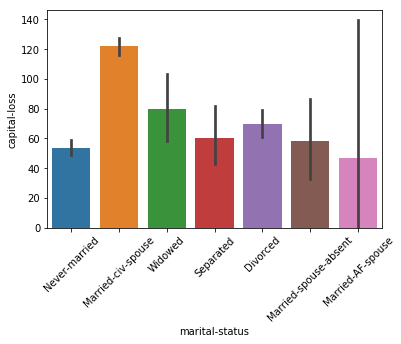

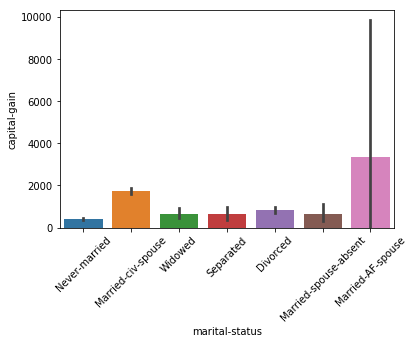

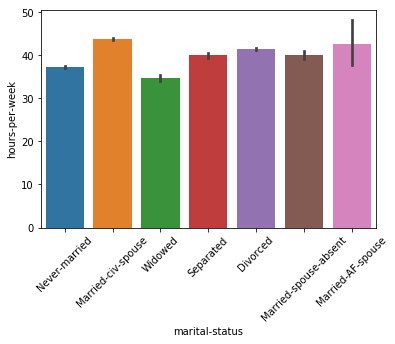

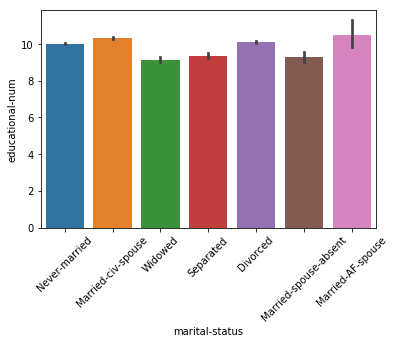

In [260]:
sns.barplot(x = 'marital-status', y= 'age' , data = new_df)
plt.xticks(rotation = 45)
plt.show()

sns.barplot(x = 'marital-status', y= 'capital-loss' , data = new_df)
plt.xticks(rotation = 45)
plt.show()

sns.barplot(x = 'marital-status', y= 'capital-gain' , data = new_df)
plt.xticks(rotation = 45)
plt.show()

sns.barplot(x = 'marital-status', y= 'hours-per-week' , data = new_df)
plt.xticks(rotation = 45)
plt.show()

sns.barplot(x = 'marital-status', y= 'educational-num' , data = new_df)
plt.xticks(rotation = 45)
plt.show()


# Observation 
* Married-civ-spouse have max. hours-per-week and capital-loss.


White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64


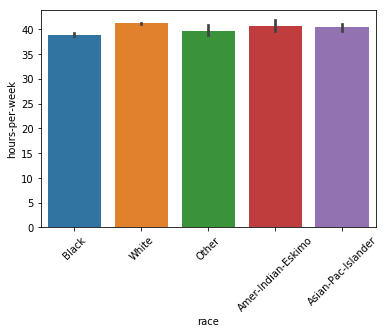

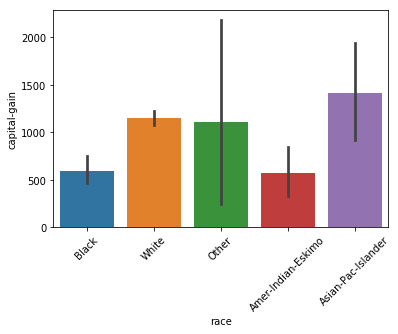

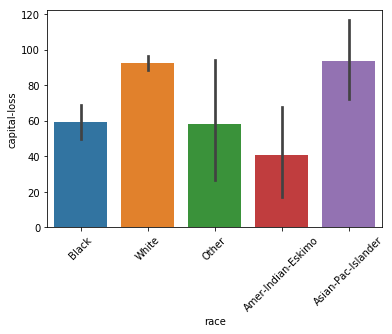

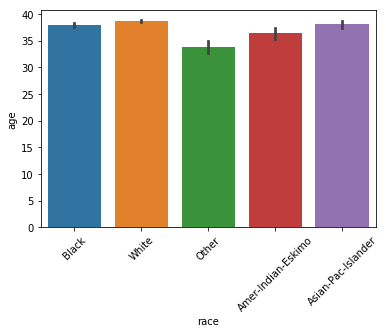

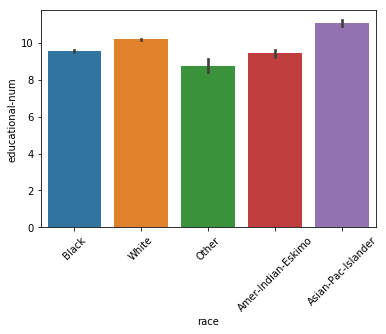

In [261]:
print(new_df['race'].value_counts())

sns.barplot(x = 'race', y = 'hours-per-week', data = new_df)
plt.xticks(rotation = 45)
plt.show()

sns.barplot(x = 'race', y = 'capital-gain', data = new_df)
plt.xticks(rotation = 45)
plt.show()

sns.barplot(x = 'race', y = 'capital-loss', data = new_df)
plt.xticks(rotation = 45)
plt.show()

sns.barplot(x = 'race', y = 'age', data = new_df)
plt.xticks(rotation = 45)
plt.show()

sns.barplot(x = 'race', y = 'educational-num', data = new_df)
plt.xticks(rotation = 45)
plt.show()

# Observation 
* Asian-Pac-Islander and Amer-Indian-Eskimo working same hours. But Asian-Pac-Islander have more capital-gain.
* Asian-Pac-Islander have more education and max. capital-gain

# Conclusion
* Most of the workers are from <b>United states</b> and <b>White</b>.
* Max. of them are <b>husband</b> and  have to work more.
* Many workers are <b>college passed</b> and working <b>40 hrs</b> per week on avg. with income <b><=50K</b>

In [262]:
# Feature Transformation

min_max = MinMaxScaler()
feature_df = min_max.fit_transform(new_df[['age','educational-num','capital-gain','capital-loss', 'hours-per-week']])
num_df = pd.DataFrame(feature_df, columns = ['age','educational-num','capital-gain','capital-loss', 'hours-per-week'])

num_df.head()

C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.



,age,educational-num,capital-gain,capital-loss,hours-per-week
0,0.109589,0.400000,0.000000,0.0,0.397959
1,0.287671,0.533333,0.000000,0.0,0.500000
2,0.150685,0.733333,0.000000,0.0,0.397959
3,0.369863,0.600000,0.076881,0.0,0.397959
4,0.232877,0.333333,0.000000,0.0,0.295918


In [263]:
# Catagorical feature:

# dummy variable.
df_dummy = pd.get_dummies(new_df[['workclass', 'race','marital-status','relationship', 'native-country', 'occupation','education']])
catg_df = pd.concat([new_df, df_workclass, df_race], axis = 1 )
catg_df.drop(['workclass', 'race', 'marital-status','relationship','native-country','occupation','education'], axis = 1, inplace = True)

# binary variable.
catg_df['gender'].replace({'Female': 1, 'Male' : 0}, inplace = True)
catg_df['income'].replace({'>50K': 1 , '<=50K': 0}, inplace = True)


catg_df.head()


,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,25,7,0,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,28,12,0,0,0,40,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,44,10,0,7688,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,34,6,0,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
